In [4]:
import sys
sys.path.append('../..')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
import seaborn as sns

from scipy import stats

import visualizor

In [6]:
df = pd.read_csv('../../final_data.csv')

C:\Users\marcu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (18,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
agg = df.groupby(['videoId', 'videoTitle', 'primaryTitle', 'averageRating', 'network']).agg(
    num_comments=('commentId', 'count')
).reset_index()

<ipython-input-8-a10f85af9e0d>:30: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax2.set_xlim(0, y.max())


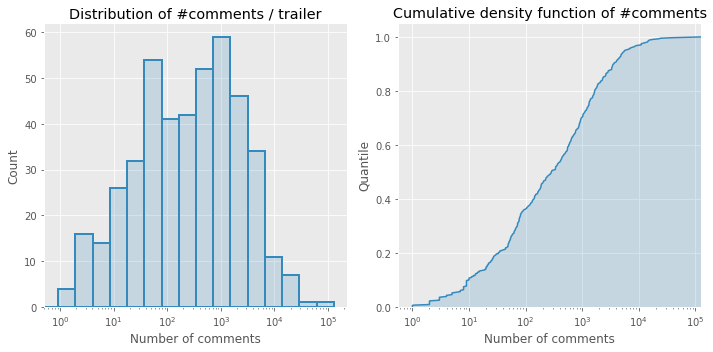

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))


bins =np.logspace(np.log10(0.1),np.log10(agg.num_comments.max()), 20)
ax1.hist(agg.num_comments, bins=bins, edgecolor='#348ABD', fill=False, linewidth=2)
ax1.hist(agg.num_comments, bins=bins, alpha=.2, color='#348ABD')
ax1.set_xscale('log')
ax1.set_xlim(0.5, agg.num_comments.max()+100000)


# ax1.xaxis.set_minor_locator(MultipleLocator(1000))

ax1.set_title('Distribution of #comments / trailer')
ax1.set_xlabel('Number of comments')
ax1.set_ylabel('Count')


x = np.linspace(0, 1, 1000)
y = agg.num_comments.quantile(x)
ax2.plot(y, x)
ax2.fill_between(y, x, alpha=.2)
ax2.set_xscale('log')
ax2.set_title('Cumulative density function of #comments')
ax2.set_xlabel('Number of comments')
ax2.set_ylabel('Quantile')



ax2.set_ylim(0, 1.05)
ax2.set_xlim(0, y.max())

plt.tight_layout()

In [48]:
fig.savefig('../figs/trailer_comment_dist.svg')

In [14]:
['#348ABD', '#E24A33', '#8EBA42', '#988ED5', '#777777', '#FBC15E', '#FFB5B8']

['#348ABD', '#E24A33', '#8EBA42', '#988ED5', '#777777', '#FBC15E', '#FFB5B8']

In [36]:
bar_params = {
    'netflix': {
        'color': '#E24A33',
        'label': 'netflix'
    },
    'amazon': {
        'color': '#348ABD',
        'label': 'amazon'
    },
    'hbo': {
        'color': '#988ED5',
        'label': 'hbo'
    },
    'disney': {
        'color': '#8EBA42',
        'label': 'disney'
    }
}

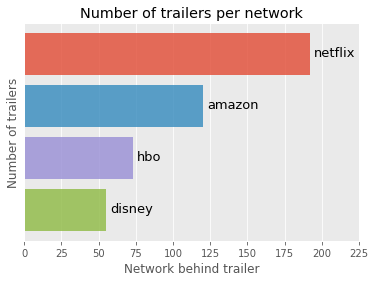

In [97]:
fig, ax = plt.subplots(figsize=(6,4))

for network in agg.network.unique()[::-1]:
    mask = agg.network == network
    ax.barh(network, agg[mask].videoId.nunique(), alpha=.8, **bar_params[network])

ax.set_xlabel('Network behind trailer')
ax.set_ylabel('Number of trailers')
ax.set_title('Number of trailers per network')

ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xlim(0,225)

for label, rect in zip(agg.network.unique()[::-1], ax.patches): 
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() + 3, rect.get_y() + height / 2 - .1, label, ha="left", va="bottom", fontsize=13
    )

In [98]:
fig.savefig('../../figs/trailer_dist.svg')